# Step 1:
Make Necessary Imports

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import sys

%matplotlib inline 



In [6]:
df = pd.read_csv('D:\Project2_Amazon\Amazon9_2021_items.csv')
df.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN


In [11]:
df.shape

(792, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          792 non-null    object 
 1   brand         792 non-null    object 
 2   title         792 non-null    object 
 3   url           792 non-null    object 
 4   image         792 non-null    object 
 5   rating        792 non-null    float64
 6   reviewUrl     792 non-null    object 
 7   totalReviews  792 non-null    int64  
 8   prices        577 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


In [12]:
df.describe()

,rating,totalReviews
count,792.000000,792.000000
mean,3.607576,104.231061
std,0.668730,166.242503
min,1.000000,1.000000
25%,3.200000,7.000000
50%,3.700000,31.500000
75%,4.000000,122.250000
max,5.000000,984.000000


In [14]:
df.isna().count()

asin            792
brand           792
title           792
url             792
image           792
rating          792
reviewUrl       792
totalReviews    792
prices          792
dtype: int64

In [16]:
df.isnull().sum()

asin              0
brand             0
title             0
url               0
image             0
rating            0
reviewUrl         0
totalReviews      0
prices          215
dtype: int64

<AxesSubplot:>

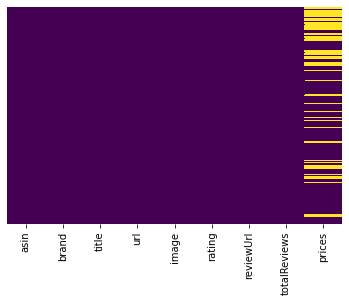

In [18]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

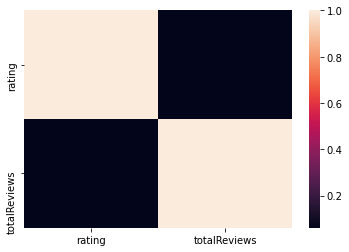

In [20]:
sns.heatmap(df.corr())

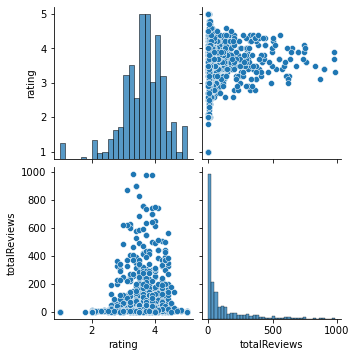

In [22]:
sns.pairplot(df)

In [28]:
print(df['brand'].unique())
df['brand'].nunique()

['Nokia' 'Motorola' 'Sony' 'Samsung' 'HUAWEI' 'Apple' 'OnePlus' 'Google'
 'ASUS' 'Xiaomi']


10

In [34]:
print(df['brand'][df['rating'] == df['rating'].max()].unique())
df['brand'][df['rating'] == df['rating'].max()].nunique()

['Samsung' 'Motorola' 'Google' 'Sony' 'Xiaomi' 'Apple' 'ASUS']


7

In [35]:
print(df['brand'][df['rating'] == df['rating'].min()].unique())
df['brand'][df['rating'] == df['rating'].min()].nunique()

['Motorola' 'Samsung' 'Apple' 'OnePlus']


4

In [41]:
df[['brand', 'prices']][df['totalReviews'] == df['totalReviews'].max()]

,brand,prices
352,Google,$107.70


In [42]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95


In [45]:
df['rating/review'] = df['rating'] / df['totalReviews']

In [46]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [47]:
df["brand"][df["rating/review"] == df["rating/review"].max()].unique()

array(['Samsung', 'Sony', 'Xiaomi', 'ASUS', 'Motorola', 'Google'],
      dtype=object)

In [72]:
df1=df.groupby(by= 'brand').count()

<AxesSubplot:xlabel='brand'>

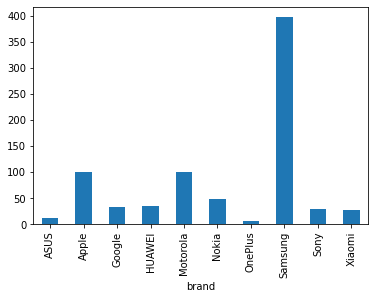

In [50]:
df1['totalReviews'].plot(kind='bar')

<AxesSubplot:xlabel='rating', ylabel='totalReviews'>

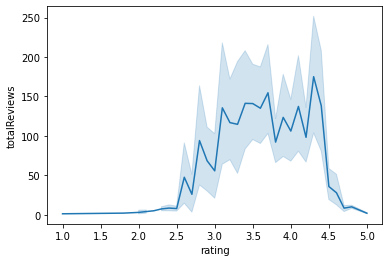

In [90]:
sns.lineplot(x=df['rating'], y=df['totalReviews'])

In [67]:
df1=df.groupby(by='brand').mean()

In [59]:
df1['rating']

brand
ASUS        3.776923
Apple       3.527723
Google      3.763636
HUAWEI      4.019444
Motorola    3.528000
Nokia       3.322449
OnePlus     3.342857
Samsung     3.573300
Sony        3.731034
Xiaomi      4.337037
Name: rating, dtype: float64

TypeError: 'str' object is not callable

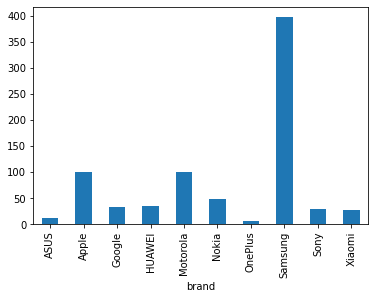

In [73]:
df1['rating'].plot(kind='bar')
plt.xlabel('Brands')
plt.ylabel('Average Ratings')
plt.title('Brands vs Ratings')

TypeError: 'str' object is not callable

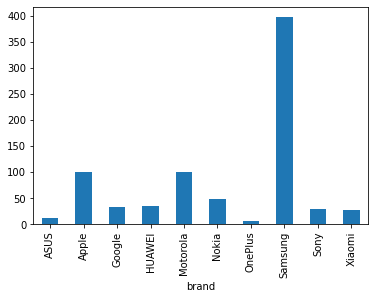

In [75]:
df1["totalReviews"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Total reviews ")
plt.title("Average Total Review vs Brands ")

In [83]:
df['rating'].unique()

array([3. , 2.9, 2.6, 2.4, 3.3, 3.2, 2. , 2.7, 3.5, 2.8, 3.4, 3.1, 4. ,
       2.5, 3.6, 1. , 3.7, 3.8, 3.9, 4.1, 2.3, 4.2, 4.6, 4.5, 5. , 2.2,
       4.4, 2.1, 4.3, 4.7, 1.8, 4.8])

In [84]:
df['totalReviews'].unique()

array([ 14,   7,  22,   5,  21,  12,   1,   3,   8, 133,   2,  18, 201,
        76, 131,  66,  15, 102, 146, 348,  56,  73,  23, 199,  28, 248,
        83, 123,  10,  20, 305, 164, 485, 147,  62,  74, 575,  48,   4,
       262,  52,  91,  71, 311, 198, 638, 699, 235,  17, 231, 333, 342,
       980, 294, 178,  85, 975,  13,  29,  57, 130, 257, 829, 685, 208,
       610, 119, 422, 113, 103, 253, 111, 218, 631, 370,  27, 416, 530,
       122,   9,  60,  59,  30, 236, 129,  58, 495,  37, 180, 230,  26,
       252, 327, 195,   6,  64, 144, 601, 623,  46, 588, 301,  38, 141,
        33, 152, 759, 157, 622, 367, 293,  36, 309,  94, 137,  67, 182,
        80,  90, 466,  32, 169,  35, 303,  19, 101, 595, 132,  11,  44,
        45, 902, 204,  41, 181, 410, 433, 112, 193, 240, 742, 300, 166,
       292,  92,  49, 270, 432, 283, 296, 392, 284, 135, 245, 413, 550,
       150, 867,  43,  40, 117, 393,  25, 116, 250, 186,  55, 107,  42,
       228,  16,  87, 318, 369,  53, 138,  61, 104, 738, 168,  5